In [1]:
import pandas as pd
data=pd.read_csv('./pimaDataset.csv')
data.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [2]:
display(data.info(),data.describe())
# there are no missing values and 
# categorical values but scaling down should be 
# done

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### We saw on data.head() and data.describe() that some features contain 0, it doesn't make sense here and this indicates missing value Below we replace 0 value by NaN 



In [3]:
import numpy as np
zeroCols=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
data[zeroCols]=data[zeroCols].replace(0,np.NaN)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [4]:
# Define missing plot to detect all missing values in dataset
def missing_plot(dataset, key) :
#     totalRecords-total null records in a particular feature
    nullFeatData = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns = ['Count'])
    nullFeatData['percentageNull'] = ((len(dataset[key]) - (len(dataset[key]) - dataset.isnull().sum()))/len(dataset[key]))*100
    nullFeatData['percentageNull'] = nullFeatData['percentageNull'].round(2)
#     nullFeatData['NullValues']=nullFeatData['percentageNull']*len(dataset[key])*0.01
    print(nullFeatData)
missing_plot(data, 'Outcome')   

                          Count  percentageNull
Pregnancies                 768            0.00
Glucose                     763            0.65
BloodPressure               733            4.56
SkinThickness               541           29.56
Insulin                     394           48.70
BMI                         757            1.43
DiabetesPedigreeFunction    768            0.00
Age                         768            0.00
Outcome                     768            0.00


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
def showOutliers(dataset,feature):
    sns.boxplot(x=dataset[feature])

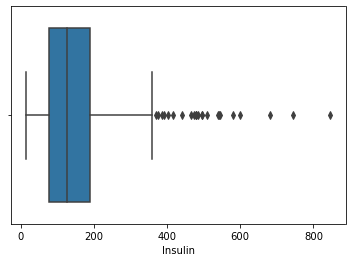

In [6]:
showOutliers(data,'Insulin')

## outliers are there in datset 

In [7]:
def findMedianOfMissingFeatures(data,feature):
    temp=data[data[feature].notnull()]
    temp=temp[[feature,'Outcome']].groupby(['Outcome'])[feature].median().reset_index()
    return temp

In [8]:
findMedianOfMissingFeatures(data,'Insulin')
findMedianOfMissingFeatures(data,'Glucose')
findMedianOfMissingFeatures(data,'SkinThickness')
findMedianOfMissingFeatures(data,'BloodPressure')
findMedianOfMissingFeatures(data,'BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [9]:
# now imputing the missing values
# for Insulin
data.loc[(data['Outcome'] == 0 ) & (data['Insulin'].isnull()), 'Insulin'] = 102.5
data.loc[(data['Outcome'] == 1 ) & (data['Insulin'].isnull()), 'Insulin'] = 169.5
# for Glucose
data.loc[(data['Outcome'] == 0 ) & (data['Glucose'].isnull()), 'Glucose'] = 107
data.loc[(data['Outcome'] == 1 ) & (data['Glucose'].isnull()), 'Glucose'] = 140
# for SkinThickness
data.loc[(data['Outcome'] == 0 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 27
data.loc[(data['Outcome'] == 1 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 32
# for BP
data.loc[(data['Outcome'] == 0 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 70
data.loc[(data['Outcome'] == 1 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 74.5
# for BMi
data.loc[(data['Outcome'] == 0 ) & (data['BMI'].isnull()), 'BMI'] = 30.1
data.loc[(data['Outcome'] == 1 ) & (data['BMI'].isnull()), 'BMI'] = 34.3


<AxesSubplot:xlabel='Outcome', ylabel='count'>

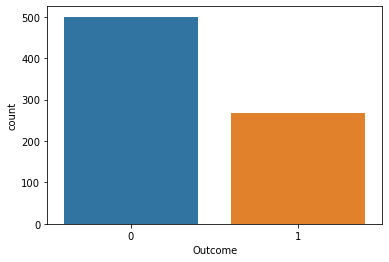

In [10]:
sns.countplot(x=data['Outcome'])
# the dataset is not balanced which is absolutely 
# true with refrence to real life

<AxesSubplot:xlabel='BMI'>

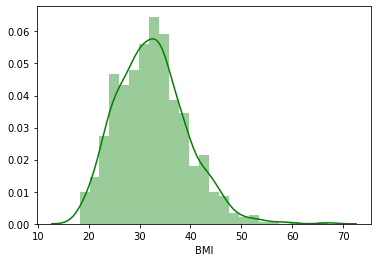

In [11]:
# sns.distplot(data['Pregnancies'],color='r')
# sns.distplot(data['Glucose'],color='b')
sns.distplot(data['BMI'],color='g')
# glucose and BMI follows gaussian distribution
# transform Pregnancies into Gaussian transformation
# data['PregnanciesNormal']=data['Pregnancies'].log
# sns.distplot(data['Pregnancies'],color='r')

<AxesSubplot:ylabel='Insulin'>

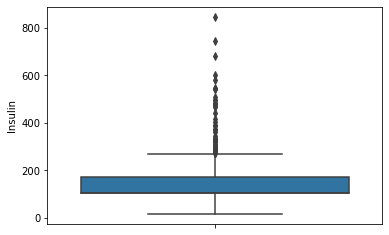

In [12]:
sns.boxplot(y=data['Insulin'],hue=data['Outcome'])
# sns.countplot(x=data['Insulin'],hue=data['Outcome'])

showOutliers(data,'Age')

# most of the data is of women under the age of 40

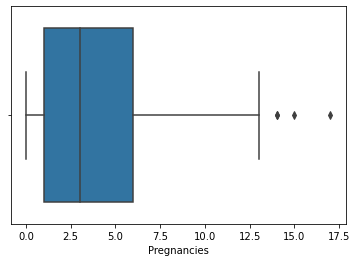

In [13]:
showOutliers(data,'Pregnancies')

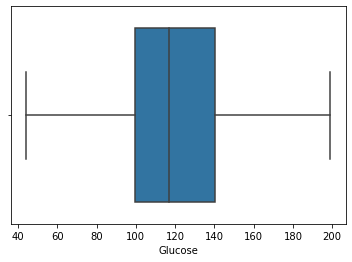

In [14]:
showOutliers(data,'Glucose')

### outcome is strongly correlated with Glucoseand ,
pregnancies,BMI,Age
but Pregnancy and Glucose is strongly correlated with Age
so Age feature may be dropped during model fitting


<AxesSubplot:>

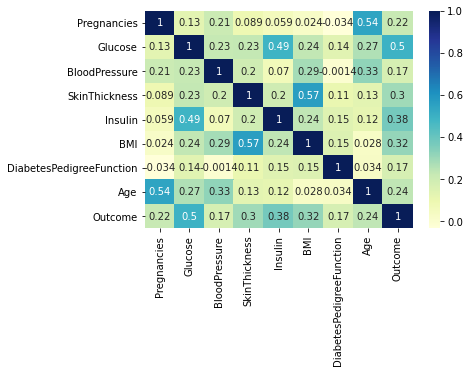

In [15]:
# finding corelation in the dataset
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')

In [16]:
scaledData=data.copy()
# scaledData.head()
cols=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaledData[cols]=scaler.fit_transform(data[cols])

In [19]:
# using minMax scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaledData[cols]=scaler.fit_transform(data[cols])

In [58]:

from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=30,random_state=21)
from sklearn.model_selection import cross_val_score
model=cross_val_score(clf,scaledData[['Pregnancies', 'Glucose','BMI','Insulin','Age']],data['Outcome'],cv=9)
model.mean()*100

89.328165374677

In [37]:
# using knn classifier
from sklearn.neighbors import KNeighborsClassifier
# clf=KNeighborsClassifier()
neihbours=[3,4,5,8,10,15,12,20,25,30,40,50,80]
for i in neihbours:
    clf=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(clf,scaledData[['Pregnancies', 'Glucose','BMI','Insulin','Age']],data['Outcome'],cv=9)
    print('the accuracy using {} is {} '.format(i,score.mean()))

the accuracy using 3 is 0.7839033287733698 
the accuracy using 4 is 0.7630034959720322 
the accuracy using 5 is 0.7852409180726554 
the accuracy using 8 is 0.7851649186806505 
the accuracy using 10 is 0.7864569083447333 
the accuracy using 15 is 0.7890864873081015 
the accuracy using 12 is 0.7903480772153822 
the accuracy using 20 is 0.7850585195318438 
the accuracy using 25 is 0.7903024775801792 
the accuracy using 30 is 0.7786137710898314 
the accuracy using 40 is 0.766955464356285 
the accuracy using 50 is 0.7695698434412525 
the accuracy using 80 is 0.7604651162790698 


In [22]:
# through scaling and using KNN algo.
# the accuracy is upto 80%

### scaling definitely increases the accuracy but by very less amount

In [53]:
# to apply logistic regression, we should check the 
# distribution of features
from sklearn.linear_model import LogisticRegression 
clf=LogisticRegression()
scaledData['Outcome']
score=cross_val_score(clf,scaledData[['Insulin','Pregnancies','Glucose','BMI','Age']],scaledData['Outcome'],cv=10)
score.mean()


0.7747949419002051

### Random forest outperformed all models without adding any new feature giving
# 89.3%